In [1]:
#Q. 1. Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.


import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException   #importing exception, since we are using dynamic page/website where the elements in page might be relocated or added or value get change 


driver =webdriver.Chrome()

#opening the website on automated chrome browser ( Open Amazon website)

driver.get("https://www.amazon.in.")


In [18]:
# Get user input
user_input = input("Enter the product to search on Amazon: ")
print(user_input)


Enter the product to search on Amazon: guitar
guitar


In [21]:
#enterning user input in the search field 
search=driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input")  #need to use XPATH instead of CLASS_NAME where no option appears when click on search field
search.send_keys(user_input)

#Then click the search button.
search.submit()

In [ ]:
# Above Q.1 was was repeatd below in a single go. (above one was done to remember & understand the step by step process )

In [4]:
#Q. 1. Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException  #importing exception, since we are using dynamic page/website where the elements in page might be relocated or added or value get change 


driver =webdriver.Chrome()

#opening the website on automated chrome browser ( Open Amazon website)

driver.get("https://www.amazon.in.")

# Get user input
user_input = input("Enter the product to search on Amazon: ")
print(user_input)


#enterning user input in the search field 
search=driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input")  #need to use XPATH instead of CLASS_NAME where no option appears when click on search field
search.send_keys(user_input)

#Then click the search button.
search.submit()

Enter the product to search on Amazon: guitar
guitar


In [5]:
# Q.2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand
#Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and
#“Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.


#Now scrape the datas like Brand, Product Description, Price for the shoes  (After scraping data from the first page, go to the “Next” Button at the bottom other page)

#Empty list for store 
Brand=[]
Product=[]
Price=[]
Return=[]
Delivery=[]
Availability=[]
URL=[]

#till 3 pages so that we can scrape atleast 100 datas
start=0
end=3


for page in range(start,end):
    #Scraping URL
    for i in driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]'):
        URL.append(i.get_attribute('href')) #to retrive any link we use get_attribute 
    

    next_button=driver.find_element(By.XPATH,'//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]') #to scrape data from next page (here we are usig 'find _elements' instead of 'find_element', so no need to write 'next_button.click()' command in next line)
    next_button.click()
    time.sleep(3) 
    
len(URL)

180

In [6]:

for i in URL:       #iterating each and every URL to fetch full job details ( loop for every guitar in the list)
    driver.get(i)   # taing each URL one by one as an input
    time.sleep(2)
    
    #Scraping Barand name
    try:
        brand_name = driver.find_element(By.XPATH,'//td[@class="a-span9"]')
        Brand.append(brand_name.text)
    
    except NoSuchElementException:
        Brand.append('-')
        
    #Scraping Product_name
    try:
        Product_name = driver.find_element(By.XPATH,'//span[@class="a-size-large product-title-word-break"]')
        Product.append(Product_name.text)
    
    except NoSuchElementException:
        Product.append('-')
    
    
    #Scraping Price
    try:
        cost = driver.find_element(By.XPATH,'//span[@class="a-price aok-align-center reinventPricePriceToPayMargin priceToPay"]')
        Price.append(cost.text)
    
    except NoSuchElementException:
        Price.append('-')
    
    
    #Scraping Return/Exchange
    try:
        Return_Exchange = driver.find_element(By.XPATH,'//h2[@class="a-size-medium return-policy-title"]')
        Return.append(Return_Exchange.text)
    
    except NoSuchElementException:
        Return.append('-')
    
    #Scraping Expected Delivery
    try:
        Expected_Delivery = driver.find_element(By.XPATH,'//div[@class="a-section a-spacing-none"]')
        Delivery.append(Expected_Delivery.text)
    
    except NoSuchElementException:
        Delivery.append('-')
    
    
    #Scraping Availability
    try:
        Product_Availability = driver.find_element(By.XPATH,'//span[@class="a-size-medium a-color-success"]')
        Availability.append(Product_Availability.text)
    
    except NoSuchElementException:
        Availability.append('-')
        
        
len(Brand),len(Product),len(Price),len(Return),len(Delivery),len(Availability)

(180, 180, 180, 180, 180, 180)

In [7]:
#Finally create a dataframe of the scraped data.
df=pd.DataFrame({'Brand Name':Brand , 'Name of the Product':Product , 'Price':Price , 'Return/Exchange':Return, 'Expected Delivery':Delivery, 'Availability':Availability, 'Product URL':URL})
df

,Brand Name,Name of the Product,Price,Return/Exchange,Expected Delivery,Availability,Product URL
0,Kadence,"Kadence rosewood Guitar Frontier Series, Elect...","₹4,999",,"FREE delivery Thursday, 5 October. Details\nOr...",In stock,https://www.amazon.in./sspa/click?ie=UTF8&spc=...
1,-,Kadence Frontier guitar with Online Guitar lea...,"₹4,299",,"FREE delivery Thursday, 5 October. Details\nOr...",In stock,https://www.amazon.in./sspa/click?ie=UTF8&spc=...
2,-,Henrix 38C 38 Inch Cutaway Acoustic Guitar Wit...,"₹2,999",,"FREE delivery Wednesday, 4 October. Details\nO...",In stock,https://www.amazon.in./sspa/click?ie=UTF8&spc=...
3,REVEL,Revel Acoustic Guitar with Carry bag and Plect...,"₹1,999",,"FREE delivery Tuesday, 3 October. Order within...",In stock,https://www.amazon.in./sspa/click?ie=UTF8&spc=...
4,-,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...","₹2,369",,"FREE delivery Monday, 2 October. Order within ...",In stock,https://www.amazon.in./Juarez-Acoustic-Cutaway...
...,...,...,...,...,...,...,...
175,-,"Kadence Astro Man Electric Guitar, with Free l...","₹9,999",,"FREE delivery Tuesday, 3 October. Details\nOr ...",In stock,https://www.amazon.in./Kadence-Astro-Electric-...
176,Kaps,"Kaps ST-10AC,6 Strings, Acoustic Guitar, Right...","₹9,500",,"FREE delivery Friday, 6 October. Order within ...",-,https://www.amazon.in./sspa/click?ie=UTF8&spc=...
177,Guitar Bro,GUITAR BRO - COMBO (Black Acoustic Rose Wood G...,"₹8,999",,"FREE delivery Saturday, 7 October. Details",In stock,https://www.amazon.in./sspa/click?ie=UTF8&spc=...
178,-,Ibanez MD39C-NT 39 Inches Rose Wood Cutaway Ac...,"₹7,699",,"FREE delivery Wednesday, 4 October. Details",In stock,https://www.amazon.in./sspa/click?ie=UTF8&spc=...


In [17]:
# Save to CSV
df.to_csv("amazon_guitar.csv", index=False)  #file got saved in 'C:\Users\riki' location

In [159]:
# Q.3.Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.


import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException  #importing exception, since we are using dynamic page/website where the elements in page might be relocated or added or value get change 


driver =webdriver.Chrome()

#opening the website on automated chrome browser ( Open Amazon website)

driver.get("https://images.google.com")





In [160]:
#enterning user input in the search field 
search=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea")  #need to use XPATH instead of CLASS_NAME where no option appears when click on search field
search.send_keys('fruits')

#Then click the search button.
search.submit()

['', '', '', '', '', '', '', '', '', '']

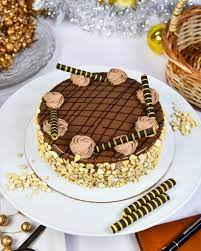
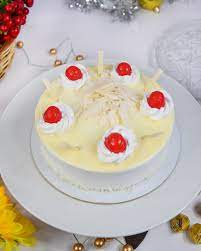
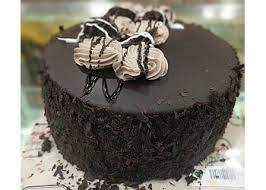
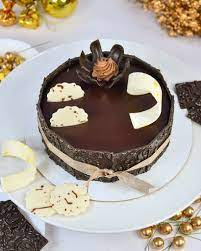
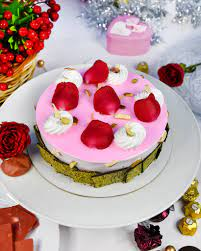
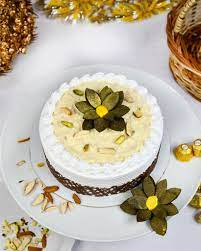
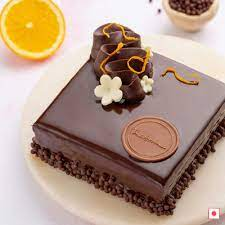
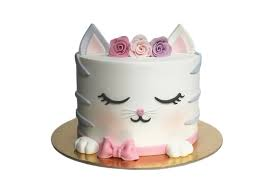
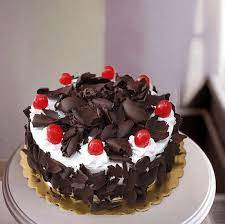
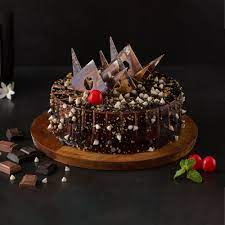

In [186]:
#empty list to store 10 images of fruits from google image
fruits=[]

#Scraping fruits images from the page
for i in driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]'):
    fruits.append(i.get_attribute('src')) 

print(fruits[0:10])   



In [174]:

#enterning user input in the search field 
search=driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/div/div[2]/input')  #need to use XPATH instead of CLASS_NAME where no option appears when click on search field
search.clear() #to clear the search bar
search.send_keys('cars')
#Then click the search button.
search.submit()

['', '', '', '', '', '', '', '', '', '']

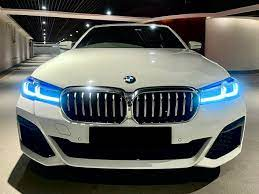
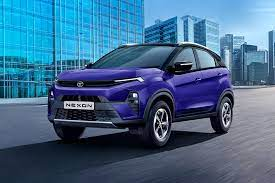
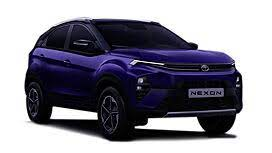
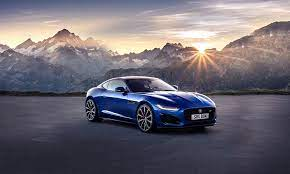
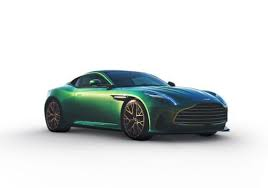
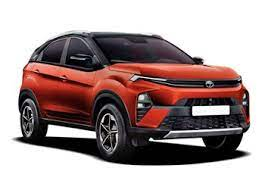
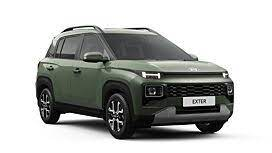
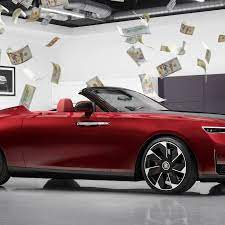
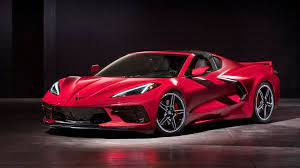
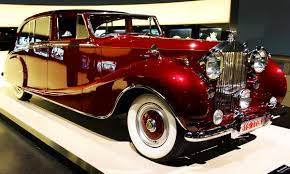

In [175]:
#empty list to store 10 images of Cars from google image
cars=[]

#Scraping fruits images from the page
for i in driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]'):
    cars.append(i.get_attribute('src')) 

print(cars[0:10])  

In [177]:
#enterning user input in the search field 
search=driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/div/div[2]/input')  #need to use XPATH instead of CLASS_NAME where no option appears when click on search field
search.clear() #to clear the search bar
search.send_keys('Machine Learning')
#Then click the search button.
search.submit()

['', '', '', '', '', '', '', '', '', '']

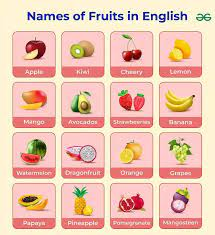
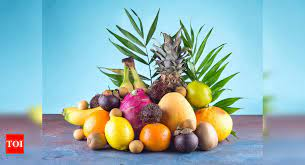
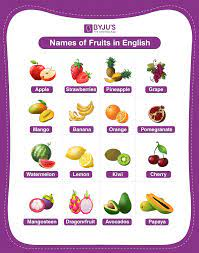
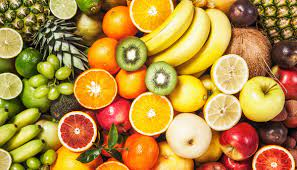
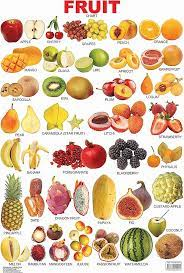
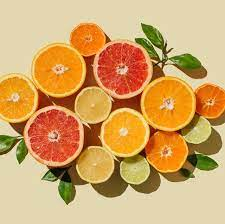
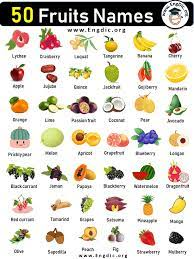
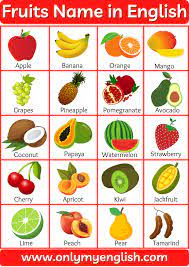
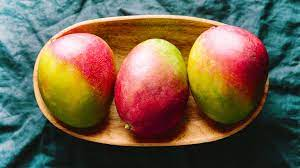
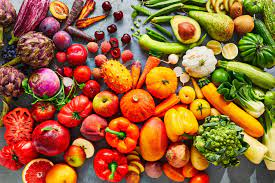

In [178]:
#empty list to store 10 images of Machine Learning from google image
Machine_learning=[]

#Scraping fruits images from the page
for i in driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]'):
    Machine_learning.append(i.get_attribute('src')) 

print(fruits[0:10])   


In [179]:
#enterning user input in the search field 
search=driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/div/div[2]/input')  #need to use XPATH instead of CLASS_NAME where no option appears when click on search field
search.clear() #to clear the search bar
search.send_keys('Guitar')
#Then click the search button.
search.submit()

['', '', '', '', '', '', '', '', '', '']

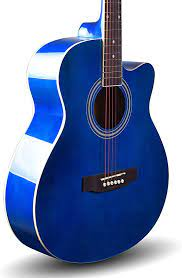
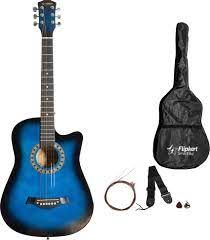
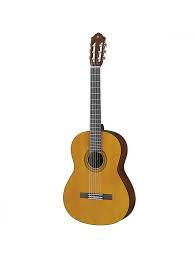
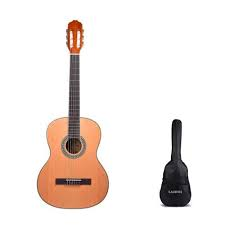
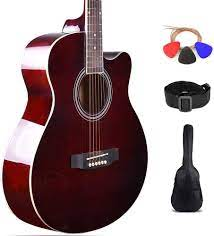
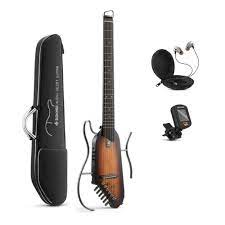
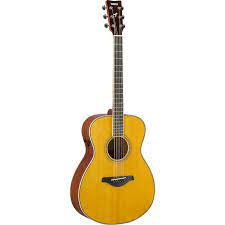
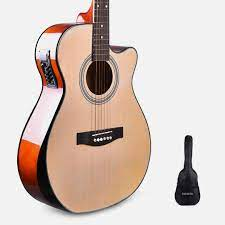
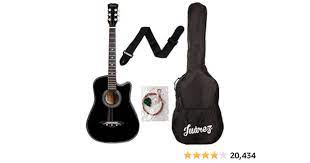
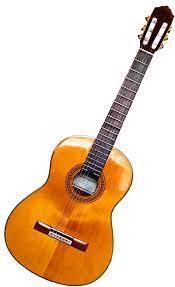

In [182]:
#empty list to store 10 images of Guitar from google image
Guitar=[]

#Scraping fruits images from the page
for i in driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]'):
    Guitar.append(i.get_attribute('src')) 

print(Guitar[0:10]) 

In [183]:
#enterning user input in the search field 
search=driver.find_element(By.XPATH,'/html/body/c-wiz/c-wiz/div/div[3]/div[2]/div/div[1]/form/div[1]/div[2]/div/div[2]/input')  #need to use XPATH instead of CLASS_NAME where no option appears when click on search field
search.clear() #to clear the search bar
search.send_keys('Cakes')
#Then click the search button.
search.submit()

['', '', '', '', '', '', '', '', '', '']

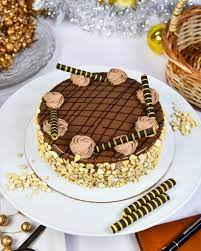
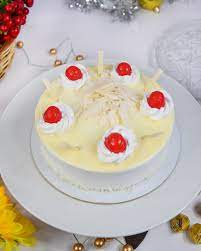
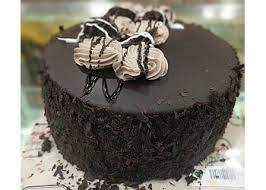
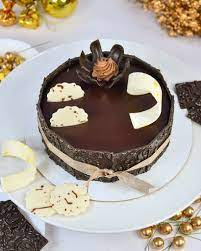
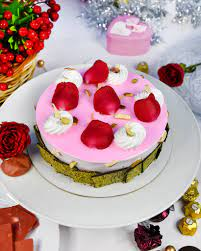
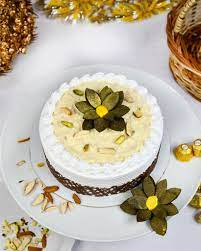
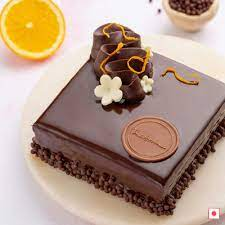
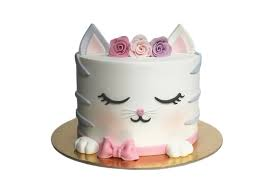
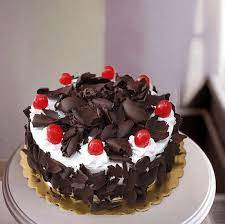
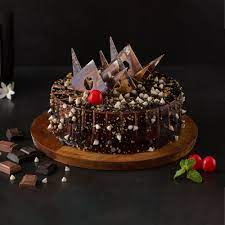

In [193]:
#empty list to store 10 images of Cakes from google image
Cakes=[]

#Scraping fruits images from the page
for i in driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]'):
    Cakes.append(i.get_attribute('src')) 
print(Cakes[0:10]) 

In [188]:
#5. Finally create a dataframe of the scraped data.
df=pd.DataFrame({'fruits':fruits[0:10] , 'cars':cars[0:10] , 'Machine_learning':Machine_learning[0:10],'Guitar':Guitar[0:10],'Cakes':Cakes[0:10] })
df

,fruits,cars,Machine_learning,Guitar,Cakes
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


In [ ]:
#NEED TO DO Q3. IN PROPER WAY 
=========================================================================================================
# Scraping fruits images from the page
for i, img_element in enumerate(driver.find_elements(By.XPATH, '//img[@class="rg_i Q4LuWd"]')):
    if i >= 10:
        break
    img_url = img_element.get_attribute('src')
    if img_url:
        fruits.append(img_url)

# Print the list of image URLs
print(fruits)
=========================================================================================================

from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import os
import requests

# Set the path to the webdriver executable (e.g., chromedriver.exe)
driver_path = '/path/to/chromedriver.exe'

# Initialize a Chrome WebDriver
driver = webdriver.Chrome(/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea)

# Keywords to search for
keywords = ['fruits', 'cars', 'Machine Learning', 'Guitar', 'Cakes']

# Function to scrape images for a given keyword
def scrape_images(keyword):
    # Entering user input in the search field
    search = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
    search.clear()
    search.send_keys(keyword)
    search.submit()

    # Wait for a few seconds for the results to load
    time.sleep(5)

    # Empty list to store 10 images
    image_urls = []

    # Scraping images from the page
    for i, img_element in enumerate(driver.find_elements(By.XPATH, '//img[@class="rg_i Q4LuWd"]')):
        if i >= 10:
            break
        img_url = img_element.get_attribute('src')
        if img_url:
            image_urls.append(img_url)

    return image_urls

# Loop through the keywords and scrape images
for keyword in keywords:
    images = scrape_images(keyword)

    # Create a directory for the keyword
    os.makedirs(keyword, exist_ok=True)

    # Download and save the images
    for i, img_url in enumerate(images):
        img_data = requests.get(img_url).content
        with open(os.path.join(keyword, f"{keyword}_{i + 1}.jpg"), "wb") as img_file:
            img_file.write(img_data)

# Close the WebDriver
driver.quit()
========================================================================================================================

In [96]:
#Q.4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”,
#“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.


import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException  #importing exception, since we are using dynamic page/website where the elements in page might be relocated or added or value get change 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


driver =webdriver.Chrome()

#opening the website on automated chrome browser ( Open Amazon website)

driver.get("https://www.flipkart.com")

# Get user input
user_input = input("Enter a smartphone to search on flipkart: ")
print(user_input)


#enterning user input in the search field 
search=driver.find_element(By.XPATH,"/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/header/div[1]/div[2]/form/div/div/input")  #need to use XPATH instead of CLASS_NAME where no option appears when click on search field
search.send_keys(user_input)

#Then click the search button.
search.submit()

Enter a smartphone to search on flipkart: Oneplus Nord
Oneplus Nord


In [103]:
#Now scrape the datas like Brand, Product Description, Price for the shoes  (After scraping data from the first page, go to the “Next” Button at the bottom other page)
#creating empty list
Brand = []          
Product=[]
Colour=[]
RAM=[]
Storage =[]          
Primary_camera=[]
Secondary_camera=[]
Display_size=[]    
Battery=[]
Price=[]

#only 1 pages so that we can scrape atleast 100 datas
start=0
end=1

#Initialize the URL list
URL = []
for page in range(start,end):
    #Scraping URL
    for i in driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]'):
        URL.append(i.get_attribute('href')) #to retrive any link we use get_attribute 
    
     
    
len(URL)

24

In [104]:
for i in URL:       #iterating each and every URL to fetch full job details ( loop for every guitar in the list)
    
    driver.get(i)   # taing each URL one by one as an input
   
  # Wait for the button to be clickable before clicking
    try:
        click = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[4]/div/div[2]/button'))
        )
        click.click()
    except Exception as e:
        print(f"Error clicking button: {e}")

    #Scraping Barand name
    #Brand=[]
    
    try:
        brand_name = driver.find_element(By.XPATH,'//span[@class="B_NuCI"]')
        Brand.append(brand_name.text)
    
    except NoSuchElementException:
        Brand.append('-')
        
    #Scraping Product_name
    #Product=[]
    
    try:
        Product_name = driver.find_element(By.XPATH,'//table[@class="_14cfVK"]/tbody/tr[3]/td[2]')
        Product.append(Product_name.text)
    
    except NoSuchElementException:
        Product.append('-')
    
    
    #Scraping Colour
    #Colour=[]
    
    try:
        Mobile_colour = driver.find_element(By.XPATH,'//table[@class="_14cfVK"]/tbody/tr[4]/td[2]')
        Colour.append(Mobile_colour.text)
    
    except NoSuchElementException:
        Colour.append('-')
    
    
    #Scraping RAM
    #RAM=[]
    
    try:
        mobile_ram = driver.find_element(By.XPATH,'//div[@class="_1UhVsV"]/div[4]/table/tbody/tr[2]/td[2]')
        RAM.append( mobile_ram.text)
    
    except NoSuchElementException:
        RAM.append('-')
    
    #Scraping Storage(ROM)
    #Storage=[]
    
    try:
        Mobile_Storage = driver.find_element(By.XPATH,'//div[@class="_1UhVsV"]/div[4]/table/tbody/tr/td[2]')
        Storage.append(Mobile_Storage.text)
    
    except NoSuchElementException:
        Storage.append('-')
    
    
    #Scraping Primary Camera
    #Primary_camera=[]
    
    try:
        front_camera = driver.find_element(By.XPATH,'//div[@class="_1UhVsV"]/div[5]/table/tbody/tr/td[2]')
        Primary_camera.append(front_camera.text)
    
    except NoSuchElementException:
        Primary_camera.append('-')
        
     
    #Scraping Secondary Camera
    #Secondary_camera=[]
    
    try:
        back_camera = driver.find_element(By.XPATH,'//div[@class="_1UhVsV"]/div[5]/table/tbody/tr[2]/td[2]')
        Secondary_camera.append(back_camera.text)
    
    except NoSuchElementException:
        Secondary_camera.append('-')
            
            
            
    #Scraping Display Size=[]
    #Display_size=[]
    
    try:
        mobile_display = driver.find_element(By.XPATH,'//div[@class="_1UhVsV"]/div[2]/table/tbody/tr/td[2]')
        Display_size.append(mobile_display.text)
    
    except NoSuchElementException:
        Display_size.append('-')
     
    
    #Scraping Battery Capacity
    #Battery=[]
    
    try:
        Mobile_Battery = driver.find_element(By.XPATH,'//div[@class="_1UhVsV"]/div[7]/table/tbody/tr/td[2]')
        Battery.append(Mobile_Battery.text)
    
    except NoSuchElementException:
        Battery.append('-')
     
    
    
    #Scraping Price
    #Price=[]
    
    try:
        Mobile_Price = driver.find_element(By.XPATH,'//div[@class="_30jeq3 _16Jk6d"]')
        Price.append(Mobile_Price.text)
    
    except NoSuchElementException:
        Price.append('-')
                        
        
len(Brand),len(Product),len(Colour),len(RAM),len(Storage),len(Primary_camera),len(Secondary_camera),len(Display_size),len(Battery),len(Price)



Error clicking button: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF64C9B7892+54818]
	(No symbol) [0x00007FF64C926AC2]
	(No symbol) [0x00007FF64C7DDA3B]
	(No symbol) [0x00007FF64C81E4FC]
	(No symbol) [0x00007FF64C81E67C]
	(No symbol) [0x00007FF64C859627]
	(No symbol) [0x00007FF64C83EAEF]
	(No symbol) [0x00007FF64C8575A2]
	(No symbol) [0x00007FF64C83E883]
	(No symbol) [0x00007FF64C813691]
	(No symbol) [0x00007FF64C8148D4]
	GetHandleVerifier [0x00007FF64CD1B992+3610402]
	GetHandleVerifier [0x00007FF64CD71860+3962352]
	GetHandleVerifier [0x00007FF64CD69D4F+3930847]
	GetHandleVerifier [0x00007FF64CA53646+693206]
	(No symbol) [0x00007FF64C931628]
	(No symbol) [0x00007FF64C92D934]
	(No symbol) [0x00007FF64C92DA62]
	(No symbol) [0x00007FF64C91E113]
	BaseThreadInitThunk [0x00007FFB9D9F7344+20]
	RtlUserThreadStart [0x00007FFB9E3626B1+33]

Error clicking button: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF64C9B7892+54818]
	(No symbol) [0x00007FF64C926AC2]
	(No symbol) [0x00007FF64C7

Error clicking button: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF64C9B7892+54818]
	(No symbol) [0x00007FF64C926AC2]
	(No symbol) [0x00007FF64C7DDA3B]
	(No symbol) [0x00007FF64C81E4FC]
	(No symbol) [0x00007FF64C81E67C]
	(No symbol) [0x00007FF64C859627]
	(No symbol) [0x00007FF64C83EAEF]
	(No symbol) [0x00007FF64C8575A2]
	(No symbol) [0x00007FF64C83E883]
	(No symbol) [0x00007FF64C813691]
	(No symbol) [0x00007FF64C8148D4]
	GetHandleVerifier [0x00007FF64CD1B992+3610402]
	GetHandleVerifier [0x00007FF64CD71860+3962352]
	GetHandleVerifier [0x00007FF64CD69D4F+3930847]
	GetHandleVerifier [0x00007FF64CA53646+693206]
	(No symbol) [0x00007FF64C931628]
	(No symbol) [0x00007FF64C92D934]
	(No symbol) [0x00007FF64C92DA62]
	(No symbol) [0x00007FF64C91E113]
	BaseThreadInitThunk [0x00007FFB9D9F7344+20]
	RtlUserThreadStart [0x00007FFB9E3626B1+33]

Error clicking button: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF64C9B7892+54818]
	(No symbol) [0x00007FF64C926AC2]
	(No symbol) [0x00007FF64C7

(24, 24, 24, 24, 24, 24, 24, 24, 24, 24)

In [105]:
#Finally create a dataframe of the scraped data.
df=pd.DataFrame({'Barand name':Brand , 'Smartphone name':Product , 'Mobile Colour':Colour , 'RAM':RAM, 'Storage(ROM)':Storage, 'Primary Camera':Primary_camera, 'Secondary Camera':Secondary_camera, 'Display Size':Display_size, 'Battery Capacity':Battery, 'Price':Price,'URL':URL})
df

,Barand name,Smartphone name,Mobile Colour,RAM,Storage(ROM),Primary Camera,Secondary Camera,Display Size,Battery Capacity,Price,URL
0,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...",Nord CE 2 Lite 5G,Blue Tide,6 GB,128 GB,64MP Rear Camera,16MP Front Camera,16.74 cm (6.59 inch),5000 mAh,"₹17,059",https://www.flipkart.com/oneplus-nord-ce-2-lit...
1,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB...",Nord CE 3 Lite 5G,Pastel Lime,8 GB,256 GB,108MP Rear Camera,Primary Camera,17.07 cm (6.72 inch),5000 mAh,"₹21,991",https://www.flipkart.com/oneplus-nord-ce-3-lit...
2,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)...",Nord CE 2 Lite 5G,Black Dusk,-,-,-,-,-,-,"₹16,936",https://www.flipkart.com/oneplus-nord-ce-2-lit...
3,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 128 GB...",Nord CE 3 Lite 5G,Pastel Lime,8 GB,128 GB,108MP Rear Camera,Primary Camera,17.07 cm (6.72 inch),5000 mAh,"₹19,999",https://www.flipkart.com/oneplus-nord-ce-3-lit...
4,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 128...",Nord CE 3 Lite 5G,Chromatic Gray,-,-,-,-,-,-,"₹19,999",https://www.flipkart.com/oneplus-nord-ce-3-lit...
5,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256...",Nord CE 3 Lite 5G,Chromatic Gray,8 GB,256 GB,108MP Rear Camera,Primary Camera,17.07 cm (6.72 inch),5000 mAh,"₹21,997",https://www.flipkart.com/oneplus-nord-ce-3-lit...
6,"OnePlus Nord CE3 5G (Aqua Surge, 256 GB) (12 ...",Nord CE3 5G,Aqua Surge,12 GB,256 GB,50MP Rear Camera,Primary Camera,17.02 cm (6.7 inch),5000 mAh,"₹28,975",https://www.flipkart.com/oneplus-nord-ce3-5g-a...
7,"OnePlus Nord CE3 5G (Aqua Surge, 128 GB) (8 G...",Nord CE3 5G,Aqua Surge,8 GB,128 GB,50MP Rear Camera,Primary Camera,17.02 cm (6.7 inch),5000 mAh,"₹25,709",https://www.flipkart.com/oneplus-nord-ce3-5g-a...
8,"OnePlus Nord CE3 5G (Grey Shimmer, 128 GB) (8...",Nord CE3 5G,Grey Shimmer,8 GB,128 GB,50MP Rear Camera,Primary Camera,17.02 cm (6.7 inch),5000 mAh,"₹26,590",https://www.flipkart.com/oneplus-nord-ce3-5g-g...
9,"OnePlus Nord CE3 5G (Grey Shimmer, 256 GB) (1...",Nord CE3 5G,Grey Shimmer,12 GB,256 GB,50MP Rear Camera,Primary Camera,17.02 cm (6.7 inch),5000 mAh,"₹28,899",https://www.flipkart.com/oneplus-nord-ce3-5g-g...


In [107]:
# Save to CSV
df.to_csv("flipkart_Oneplus Nord.csv", index=False)  #file got saved in 'C:\Users\riki' location
df.to_csv  

<bound method NDFrame.to_csv of                                           Barand name    Smartphone name  \
0   OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB) ...  Nord CE 2 Lite 5G   
1   OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB...  Nord CE 3 Lite 5G   
2   OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)...  Nord CE 2 Lite 5G   
3   OnePlus Nord CE 3 Lite 5G (Pastel Lime, 128 GB...  Nord CE 3 Lite 5G   
4   OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 128...  Nord CE 3 Lite 5G   
5   OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256...  Nord CE 3 Lite 5G   
6   OnePlus Nord CE3 5G (Aqua Surge, 256 GB)  (12 ...        Nord CE3 5G   
7   OnePlus Nord CE3 5G (Aqua Surge, 128 GB)  (8 G...        Nord CE3 5G   
8   OnePlus Nord CE3 5G (Grey Shimmer, 128 GB)  (8...        Nord CE3 5G   
9   OnePlus Nord CE3 5G (Grey Shimmer, 256 GB)  (1...        Nord CE3 5G   
10  OnePlus Nord 3 5G (Misty Green, 128 GB)  (8 GB...          Nord 3 5G   
11  OnePlus Nord 2T 5G (Gray Shadow, 128 GB)  (8 G...   

In [ ]:
#Q5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.


In [11]:
#Q6.Write a program to scrap all the available details of best gaming laptops from digit.in.
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException  #importing exception, since we are using dynamic page/website where the elements in page might be relocated or added or value get change 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


driver =webdriver.Chrome()

#opening the website on automated chrome browser ( Open Amazon website)

driver.get("https://www.digit.in.")



In [13]:
#Then click the setting button.
search=driver.find_element(By.XPATH,'//button[@class="dl-trigger"]')
search.click()

In [14]:
#Then click the top 10s button.
search=driver.find_element(By.XPATH,'/html/body/div[4]/div/ul/li[4]/a')
search.click()

In [15]:
#Then click the top laptops button.
laptop=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div/div[2]/div[1]/div[2]/div[6]/p/a')
laptop.click()

In [36]:
#creating empty list
Product=[]          
Operating_system=[]
Display=[]
Resolution=[]
Processor=[]          
 #Scraping product name
try:
    Product_name = driver.find_element(By.XPATH,'//h3[@class="font130 mt0 mb10 mobilesblockdisplay"]')
    Product.append(Product_name.text)
    
except NoSuchElementException:
        Product.append('-')
        
#Scraping operating system
try:
    system = driver.find_element(By.XPATH,'//div[@class="rh_gr_middle_desc"]/div/div/div/span[2]')
    Operating_system.append(system.text)
    
except NoSuchElementException:
    Operating_system.append('-')
    
    
#Scraping Display
try:
    Display_system = driver.find_element(By.XPATH,'//div[@class="rh_gr_middle_desc"]/div/div[2]/div/span[2]')
    Display.append(Display_system.text)
    
except NoSuchElementException:
    Display.append('-')
    
    
#Scraping Resolution
try:
    Laptop_Resolution = driver.find_element(By.XPATH,'//div[@class="rh_gr_middle_desc"]/div/div[3]/div/span[2]')
    Resolution.append(Laptop_Resolution.text)
    
except NoSuchElementException:
    Resolution.append('-')
    
#Scraping processor
try:
    Laptop_processor = driver.find_element(By.XPATH,'//div[@class="rh_gr_middle_desc"]/div/div[4]/div/span[2]')
    Processor.append(Laptop_processor.text)
    
except NoSuchElementException:
    Processor.append('-')
    
        
len(Product),len(Operating_system),len(Display),len(Resolution),len(Processor)

(1, 1, 1, 1, 1)

In [10]:
#Finally create a dataframe of the scraped data.
df=pd.DataFrame({'Product':Product , 'Operating system':Operating_system , 'Display':Display , 'Resolution':Resolution, 'Processor':Processor})
df

,Product,Operating system,Display,Resolution,Processor
0,Apple MacBook Air 2022 M2 MLY03HN/A,iOS,13.6,2560 x 1600,Apple M2


In [49]:
#Q7. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException  #importing exception, since we are using dynamic page/website where the elements in page might be relocated or added or value get change 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


driver =webdriver.Chrome()

#opening the website on automated chrome browser ( Open Amazon website)

driver.get("https://www.forbes.com.")



In [56]:
#Then click the setting button.
search=driver.find_element(By.XPATH,'//div[@class="_8FT-x3t4"]')
search.click()

In [58]:
#Then click the Bilionaires button.
search=driver.find_element(By.XPATH,'//div[@class="mpBfVZz3"]/span')
search.click()

In [59]:
#Then click the View all Bilionaires button.
search=driver.find_element(By.XPATH,'//li[@class="TjJgrPSg _2bNo56RE secondary"]')
search.click()

In [ ]:
#NOT ABLE TO COPY COLUMN